### Importing Libraries

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

### Loading the datasets 

In [374]:
business_df=pd.read_csv("/Users/simrannayak/Desktop/Flight Fare Analysis/Dataset/business.csv")

In [376]:
economy_df=pd.read_csv("/Users/simrannayak/Desktop/Flight Fare Analysis/Dataset/economy.csv")

In [378]:
business_df.shape

(93487, 11)

In [380]:
economy_df.shape

(206774, 11)

In [382]:
business_df.insert(loc=7,column = 'Class',value='Business')

In [384]:
economy_df.insert(loc=7,column = 'Class',value='Economy')

In [386]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,Business,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,Business,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [388]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,Economy,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,Economy,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,Economy,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,Economy,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,Economy,non-stop,11:10,Mumbai,"5,955"


### Exploratory Data Analysis

In [391]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   Class       93487 non-null  object
 8   stop        93487 non-null  object
 9   arr_time    93487 non-null  object
 10  to          93487 non-null  object
 11  price       93487 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.6+ MB


In [393]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   Class       206774 non-null  object
 8   stop        206774 non-null  object
 9   arr_time    206774 non-null  object
 10  to          206774 non-null  object
 11  price       206774 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.9+ MB


### Concatenating Business and Econonmy datasets

In [396]:
# Concatenating the datasets
combined_df = pd.concat([business_df, economy_df], ignore_index=True)

In [398]:
combined_df.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,Economy,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,Economy,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,Economy,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,Economy,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
300260,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,Economy,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"8,640"


In [400]:
combined_df.shape

(300261, 12)

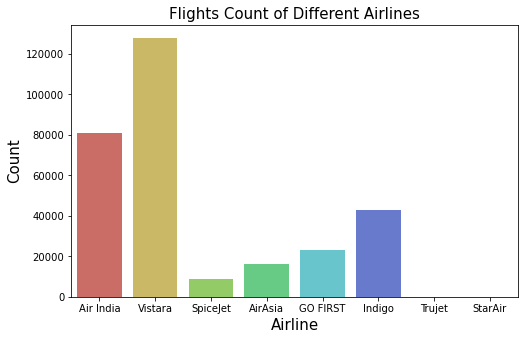

In [404]:
# Flights Count of Different Airlines
plt.figure(figsize=(8,5))
sns.countplot(combined_df['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
combined_df2=combined_df.groupby(['flight','airline','class'],as_index=False).count()
combined_df2['class'].value_counts()

In [ ]:
plt.figure(figsize=(8,6))
combined_df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

### Data Visualization (Object Type Variables) - Bar Chart

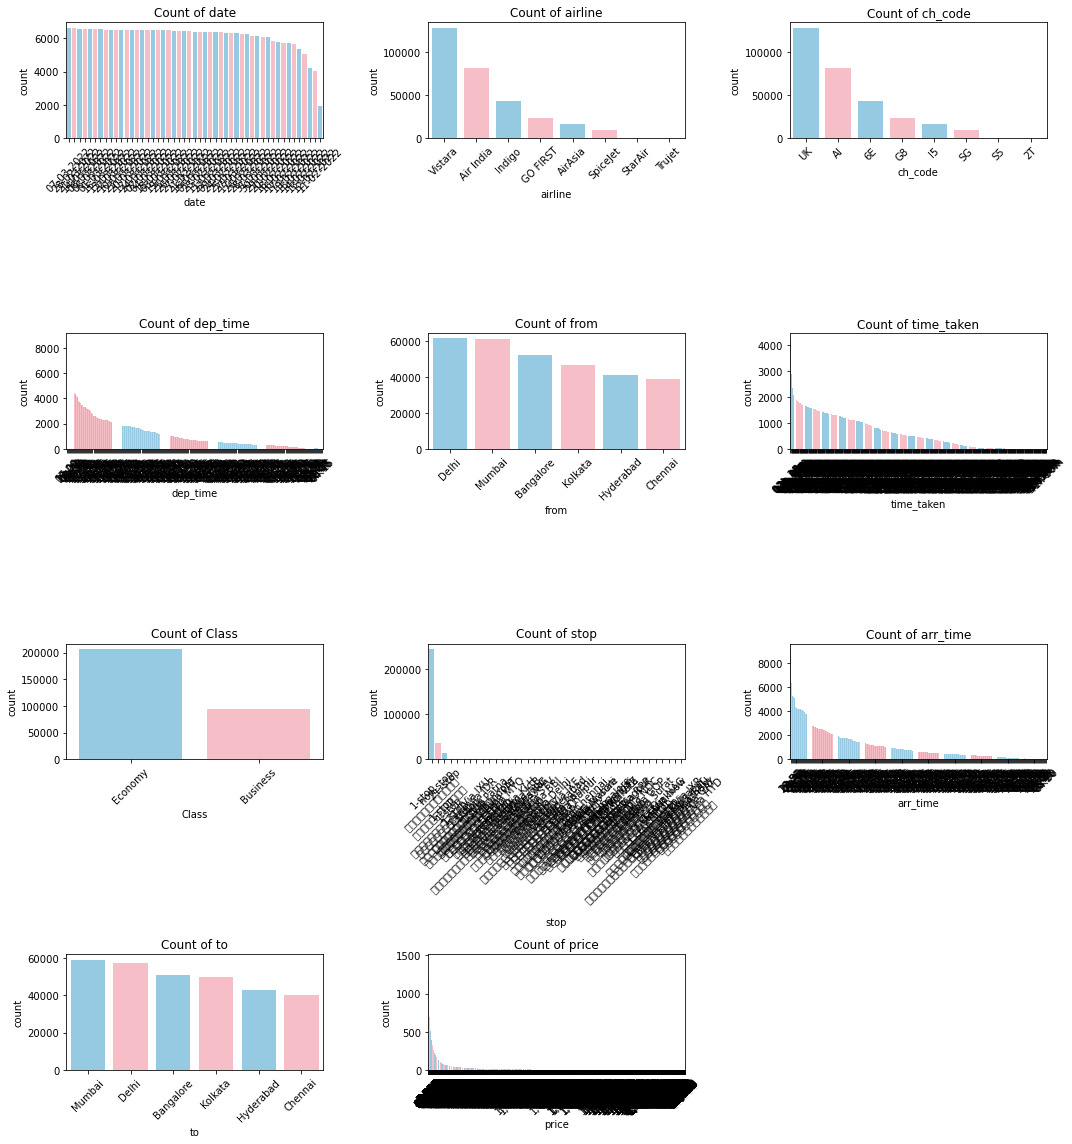

In [129]:
# Select categorical columns
categorical_vars = combined_df.select_dtypes(include=['object'])

num_features = len(categorical_vars.columns)
num_cols = 3 
num_rows = (num_features + num_cols - 1) // num_cols  

plt.figure(figsize=(num_cols * 5, num_rows * 4))  

# Create count plots for each categorical feature
for i, column in enumerate(categorical_vars.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=combined_df, x=column, order=combined_df[column].value_counts().index,palette=["#89CFF0", "#FFB6C1"])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Understanding Categorical Column

In [132]:
# Understanding Categorical Column
def categorical_summary(dataframe, col_name):
    print(pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),  # Count of unique values
        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)  # Percentage of each unique value
    }))
    print("------------------------------------------------------------------")

In [134]:
# Categorical Summary in Training set
for col in categorical_vars:
    categorical_summary(combined_df, col)

            date     Ratio
07-03-2022  6633  2.209078
28-02-2022  6603  2.199087
21-03-2022  6594  2.196089
14-03-2022  6586  2.193425
08-03-2022  6577  2.190428
06-03-2022  6543  2.179104
01-03-2022  6541  2.178438
15-03-2022  6536  2.176773
13-03-2022  6536  2.176773
22-03-2022  6535  2.176440
10-03-2022  6527  2.173775
23-03-2022  6526  2.173442
20-03-2022  6513  2.169113
12-03-2022  6505  2.166449
24-03-2022  6503  2.165782
02-03-2022  6502  2.165449
04-03-2022  6495  2.163118
18-03-2022  6491  2.161786
03-03-2022  6483  2.159122
19-03-2022  6480  2.158122
25-03-2022  6473  2.155791
26-03-2022  6440  2.144801
27-02-2022  6420  2.138140
21-02-2022  6418  2.137474
16-03-2022  6412  2.135475
05-03-2022  6405  2.133144
23-02-2022  6404  2.132811
11-03-2022  6398  2.130813
22-02-2022  6385  2.126483
09-03-2022  6361  2.118490
24-02-2022  6353  2.115826
25-02-2022  6342  2.112162
27-03-2022  6314  2.102837
17-03-2022  6296  2.096842
26-02-2022  6279  2.091181
28-03-2022  6160  2.051548
3

### Data Manipulation

In [40]:
# Combing 'from' and 'to' columns into one as 'route'
combined_df['route']=combined_df['from'].astype(str)+'-'+combined_df['to'].astype(str)

In [42]:
combined_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,Business,non-stop,20:00,Mumbai,"25,612",Delhi-Mumbai
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,Business,non-stop,21:15,Mumbai,"25,612",Delhi-Mumbai
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Delhi-Mumbai
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Delhi-Mumbai
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Delhi-Mumbai


In [45]:
Route = {
'Delhi-Mumbai':'1148', 'Delhi-Bangalore':'1740', 'Delhi-Kolkata':'1305',
       'Delhi-Hyderabad':'1253', 'Delhi-Chennai':'1757', 'Mumbai-Delhi':'1137',
       'Mumbai-Bangalore':'845', 'Mumbai-Kolkata':'1652', 'Mumbai-Hyderabad':'617',
       'Mumbai-Chennai':'1031', 'Bangalore-Delhi':'1740', 'Bangalore-Mumbai':'833',
       'Bangalore-Kolkata':'970', 'Bangalore-Hyderabad':'453', 'Bangalore-Chennai':'289',
       'Kolkata-Delhi':'1305', 'Kolkata-Mumbai':'1652', 'Kolkata-Bangalore':'1560',
       'Kolkata-Hyderabad':'1180', 'Kolkata-Chennai':'1383', 'Hyderabad-Delhi':'1264',
       'Hyderabad-Mumbai':'621', 'Hyderabad-Bangalore':'453', 'Hyderabad-Kolkata':'1209',
       'Hyderabad-Chennai':'507', 'Chennai-Delhi':'1760', 'Chennai-Mumbai':'1031',
       'Chennai-Bangalore':'268', 'Chennai-Kolkata':'1383', 'Chennai-Hyderabad':'514'
}

In [47]:
#combined_df['Distance'] = combined_df['route'].map(Route)

In [49]:
#combined_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Distance
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,Business,non-stop,20:00,Mumbai,"25,612",Delhi-Mumbai,1148
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,Business,non-stop,21:15,Mumbai,"25,612",Delhi-Mumbai,1148
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Delhi-Mumbai,1148
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Delhi-Mumbai,1148
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Delhi-Mumbai,1148


In [51]:
#combined_df['Distance']=combined_df['Distance'].astype(int)

In [222]:
#But there are majority of stops that are missing. As a result of which distances may be mostly inaccurate. 
#So its better not to consider distance for ourfuture analysis.

In [53]:
#combined_df.drop('Distance',axis=1,inplace=True)

### Data Cleaning

In [410]:
combined_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,Business,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,Business,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,Business,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


### 1. 'stop' column cleaning

In [417]:
# Removing the extra ',' from price column
combined_df['price']=combined_df['price'].str.replace(',','')

In [419]:
# Splitting the unwanted character
combined_df['stop'] = combined_df['stop'].str.split('\n').str[0]

In [421]:
# Displaying unique values of 'stop' column
combined_df['stop'].unique()

array(['non-stop ', '1-stop', '2+-stop'], dtype=object)

In [423]:
# Standardizing 'stop' column by replacing inconsistent formats
combined_df['stop']=combined_df['stop'].replace('2+-stop','2-stop')

In [425]:
# Remove leading/trailing spaces
combined_df['stop'] = combined_df['stop'].str.strip()  

# Standardizing 'non-stop' to '0-stop' for consistency
combined_df['stop'] = combined_df['stop'].replace('non-stop', '0-stop')

In [427]:
combined_df['stop'].unique()

array(['0-stop', '1-stop', '2-stop'], dtype=object)

In [431]:
# Splitting the unwanted character from 'stop' column
combined_df['stop'] = combined_df['stop'].str.split('-').str[0]

In [433]:
combined_df['stop'].unique()

array(['0', '1', '2'], dtype=object)

In [435]:
combined_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,Business,0,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,Business,0,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,Business,1,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,Business,1,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,Business,1,23:55,Mumbai,46690


### 2. 'time_taken' column cleaning

In [438]:
# Manipulating the time_taken column:

# Replaces spaces (' ') with dots ('.')
combined_df['time_taken']=combined_df['time_taken'].str.replace(' ','.')

# Removes the 'h' (hours) character and replaces it with ('')
combined_df['time_taken']=combined_df['time_taken'].str.replace('h','')

# Removes the 'm' (minutes) character and replaces it with ('')
combined_df['time_taken']=combined_df['time_taken'].str.replace('m','')

In [444]:
combined_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02.00,Business,0,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,624,19:00,Delhi,02.15,Business,0,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,531,20:00,Delhi,24.45,Business,1,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,839,21:25,Delhi,26.30,Business,1,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,544,17:15,Delhi,06.40,Business,1,23:55,Mumbai,46690


In [446]:
# Checking all the uniques values of 'time_taken' column
print(combined_df['time_taken'].unique())

['02.00' '02.15' '24.45' '26.30' '06.40' '02.10' '17.45' '22.45' '17.55'
 '11.00' '15.15' '11.25' '15.50' '21.35' '26.00' '05.45' '16.10' '28.10'
 '19.20' '23.50' '27.10' '06.00' '19.30' '26.50' '12.25' '14.40' '24.25'
 '26.40' '28.15' '15.35' '17.50' '18.15' '02.05' '03.30' '03.45' '17.30'
 '25.35' '06.20' '02.20' '08.00' '20.35' '10.05' '04.25' '23.55' '14.10'
 '15.45' '04.50' '07.00' '20.50' '23.45' '26.25' '13.15' '21.25' '06.25'
 '05.00' '30.05' '05.20' '08.15' '12.35' '15.30' '23.30' '27.45' '08.25'
 '12.10' '20.25' '24.50' '09.05' '15.25' '07.35' '11.10' '12.45' '13.45'
 '18.00' '07.55' '06.15' '08.55' '24.55' '29.40' '21.05' '27.35' '28.25'
 '24.35' '26.10' '16.30' '25.55' '19.05' '22.50' '11.20' '14.55' '07.15'
 '20.05' '23.10' '24.10' '30.00' '06.30' '13.50' '08.50' '18.20' '21.50'
 '04.35' '10.55' '25.05' '16.20' '19.15' '23.35' '13.05' '18.35' '14.25'
 '16.40' '05.30' '12.50' '16.00' '17.00' '14.45' '13.25' '08.35' '07.20'
 '09.10' '11.35' '11.40' '13.35' '23.05' '05.50' '1

From the data exploration, I found that the `time_taken` column contained values such as '1.03.', '1.02.', and '1.01.'. To clean the data, I removed any trailing periods from all values to ensure consistency and proper formatting.

In [450]:
# Removing any trailing periods from all values
combined_df['time_taken'] = combined_df['time_taken'].str.rstrip('.')

In [454]:
print(combined_df['time_taken'].unique())

['02.00' '02.15' '24.45' '26.30' '06.40' '02.10' '17.45' '22.45' '17.55'
 '11.00' '15.15' '11.25' '15.50' '21.35' '26.00' '05.45' '16.10' '28.10'
 '19.20' '23.50' '27.10' '06.00' '19.30' '26.50' '12.25' '14.40' '24.25'
 '26.40' '28.15' '15.35' '17.50' '18.15' '02.05' '03.30' '03.45' '17.30'
 '25.35' '06.20' '02.20' '08.00' '20.35' '10.05' '04.25' '23.55' '14.10'
 '15.45' '04.50' '07.00' '20.50' '23.45' '26.25' '13.15' '21.25' '06.25'
 '05.00' '30.05' '05.20' '08.15' '12.35' '15.30' '23.30' '27.45' '08.25'
 '12.10' '20.25' '24.50' '09.05' '15.25' '07.35' '11.10' '12.45' '13.45'
 '18.00' '07.55' '06.15' '08.55' '24.55' '29.40' '21.05' '27.35' '28.25'
 '24.35' '26.10' '16.30' '25.55' '19.05' '22.50' '11.20' '14.55' '07.15'
 '20.05' '23.10' '24.10' '30.00' '06.30' '13.50' '08.50' '18.20' '21.50'
 '04.35' '10.55' '25.05' '16.20' '19.15' '23.35' '13.05' '18.35' '14.25'
 '16.40' '05.30' '12.50' '16.00' '17.00' '14.45' '13.25' '08.35' '07.20'
 '09.10' '11.35' '11.40' '13.35' '23.05' '05.50' '1

In [458]:
# Changing dtype of 'time_taken' to float for further numerical analysis, modeling, or feature engineering
combined_df['time_taken']=combined_df['time_taken'].astype(float)

In [460]:
# Drop 'Flight_code' if it already exists to avoid errors
combined_df.drop(columns=['Flight_code'], errors='ignore', inplace=True) 

# Creating 'Flight_code' by combining 'ch_code' and 'num_code'
combined_df.insert(3, 'Flight_code', combined_df['ch_code'].astype(str) + '-' + combined_df['num_code'].astype(str))  


In [462]:
combined_df.head()

,date,airline,ch_code,Flight_code,num_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI,AI-868,868,18:00,Delhi,2.00,Business,0,20:00,Mumbai,25612
1,11-02-2022,Air India,AI,AI-624,624,19:00,Delhi,2.15,Business,0,21:15,Mumbai,25612
2,11-02-2022,Air India,AI,AI-531,531,20:00,Delhi,24.45,Business,1,20:45,Mumbai,42220
3,11-02-2022,Air India,AI,AI-839,839,21:25,Delhi,26.30,Business,1,23:55,Mumbai,44450
4,11-02-2022,Air India,AI,AI-544,544,17:15,Delhi,6.40,Business,1,23:55,Mumbai,46690


In [464]:
# Dropping 'ch_code','num_code' from our dataset
combined_df.drop(['ch_code','num_code'],axis=1,inplace=True)

In [466]:
combined_df.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price
0,11-02-2022,Air India,AI-868,18:00,Delhi,2.00,Business,0,20:00,Mumbai,25612
1,11-02-2022,Air India,AI-624,19:00,Delhi,2.15,Business,0,21:15,Mumbai,25612
2,11-02-2022,Air India,AI-531,20:00,Delhi,24.45,Business,1,20:45,Mumbai,42220
3,11-02-2022,Air India,AI-839,21:25,Delhi,26.30,Business,1,23:55,Mumbai,44450
4,11-02-2022,Air India,AI-544,17:15,Delhi,6.40,Business,1,23:55,Mumbai,46690


In [468]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         300261 non-null  object 
 1   airline      300261 non-null  object 
 2   Flight_code  300261 non-null  object 
 3   dep_time     300261 non-null  object 
 4   from         300261 non-null  object 
 5   time_taken   300261 non-null  float64
 6   Class        300261 non-null  object 
 7   stop         300261 non-null  object 
 8   arr_time     300261 non-null  object 
 9   to           300261 non-null  object 
 10  price        300261 non-null  object 
dtypes: float64(1), object(10)
memory usage: 25.2+ MB


Here the target variable `price` is object type, but in nature it has to be numerice type.Thus changing dtype has of `price` into `int`

In [471]:
# Converting dtype of 'price' into 'int'
combined_df['price']=combined_df['price'].astype(int)

In [473]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         300261 non-null  object 
 1   airline      300261 non-null  object 
 2   Flight_code  300261 non-null  object 
 3   dep_time     300261 non-null  object 
 4   from         300261 non-null  object 
 5   time_taken   300261 non-null  float64
 6   Class        300261 non-null  object 
 7   stop         300261 non-null  object 
 8   arr_time     300261 non-null  object 
 9   to           300261 non-null  object 
 10  price        300261 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 25.2+ MB


In [477]:
# Summary statistics for categorical columns
combined_df.describe(include='object')

,date,airline,Flight_code,dep_time,from,Class,stop,arr_time,to
count,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,251,6,2,3,266,6
top,07-03-2022,Vistara,UK-706,07:00,Delhi,Economy,1,19:55,Mumbai
freq,6633,127859,3235,8760,61345,206774,250929,9194,59109


In [479]:
# Summary statistics for numerical columns
combined_df.describe(include='int')

,price
count,300261.000000
mean,20883.717666
std,22695.911266
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


# Univariate Analysis

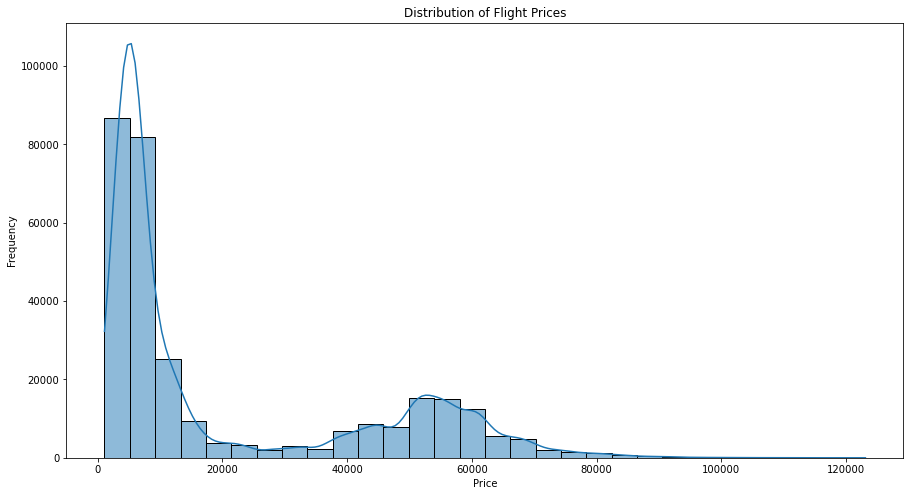

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of flight prices
plt.figure(figsize=(15,8))  # Set figure size
sns.histplot(combined_df['price'], kde=True, bins=30)  
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

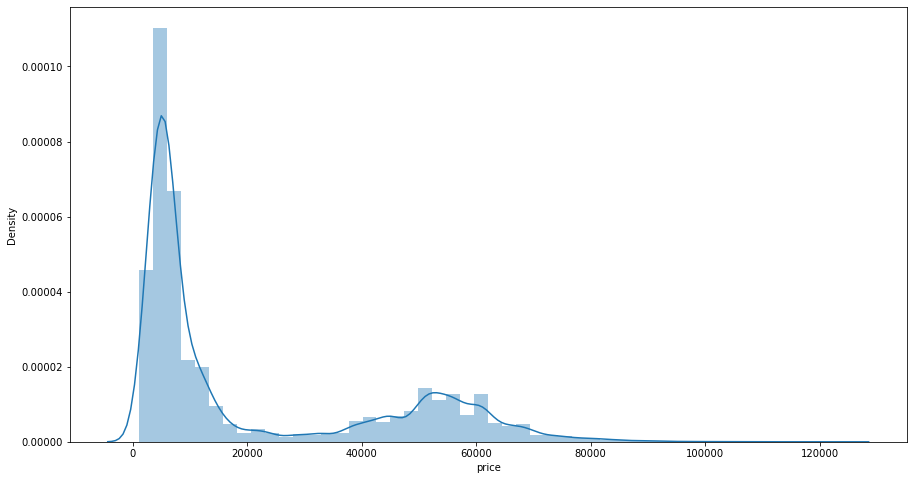

In [481]:
# Distplot of flight prices
plt.figure(figsize=(15,8))
sns.distplot(combined_df['price'],kde=True)

In [486]:
# Skewness of 'price'
combined_df['price'].skew()

1.0618915252479717

From the above plot, the target variable seems to be highly right skewed.

In [490]:
# Separting categorical variables for the plots 
combined_df_cat=combined_df[['airline','from','to','Class','stop']]

airline


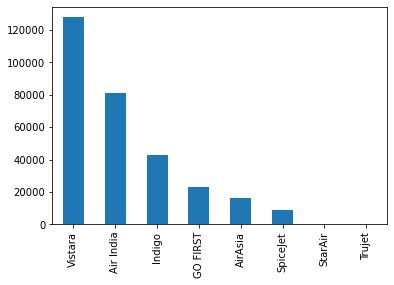

from


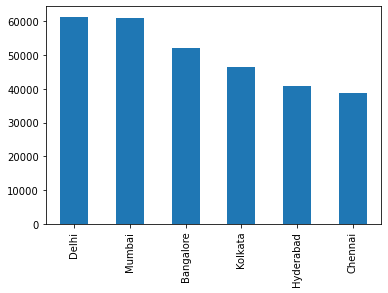

to


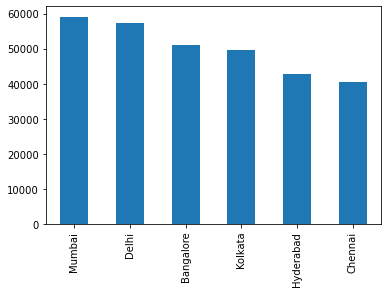

Class


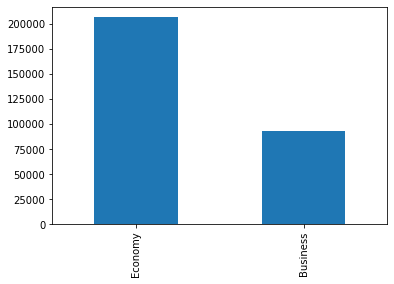

stop


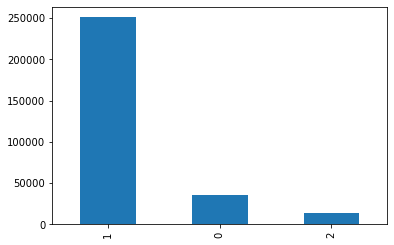

In [492]:
# Bar plots of categorical variable
for i in combined_df_cat.columns:
    print(i)
    # Plot the count of unique values as a bar chart
    combined_df[i].value_counts().plot(kind='bar')
    plt.show()

**Main Takeaway:**

1)The number of flights for vistara airlines are the highest among all.

2)Flights running from Delhi as well as Mumbai airpost are largest in number while chennai being the lowest.

3)Flights reaching Mumbai airport are largest in number while in chennai flights arriving are the lowest.

4)Flights with economy classes are larger in number.

5)Majority of flights are having single stop.

# Bivariate analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

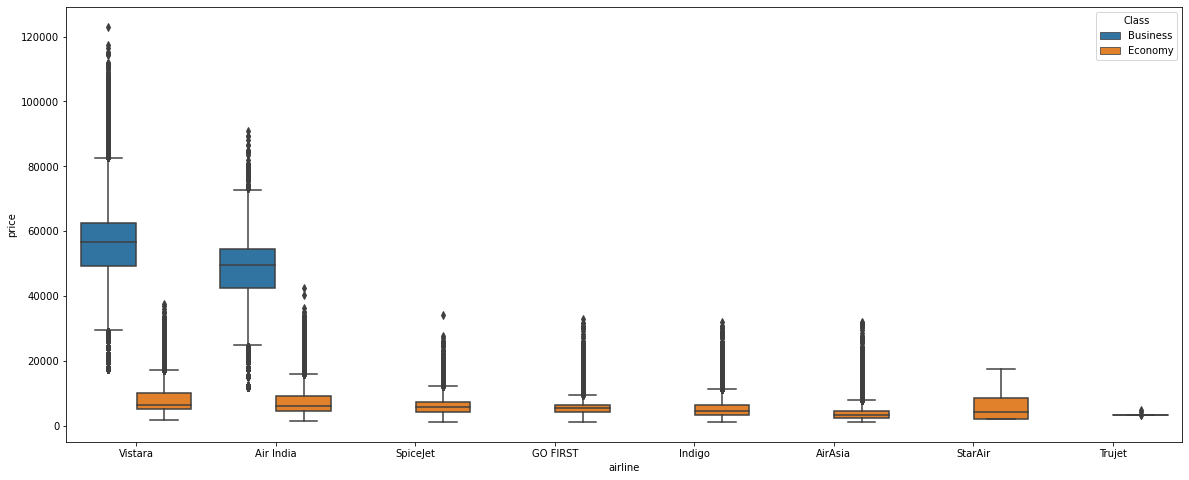

In [501]:
plt.figure(figsize=(20,8))
sns.boxplot(data=combined_df.sort_values('price',ascending=False),y='price',x='airline',hue='Class')
plt.show

From above boxplot,we can say that ticket price for Business class in **Vistara** Airlines is most expensive.

<function matplotlib.pyplot.show(close=None, block=None)>

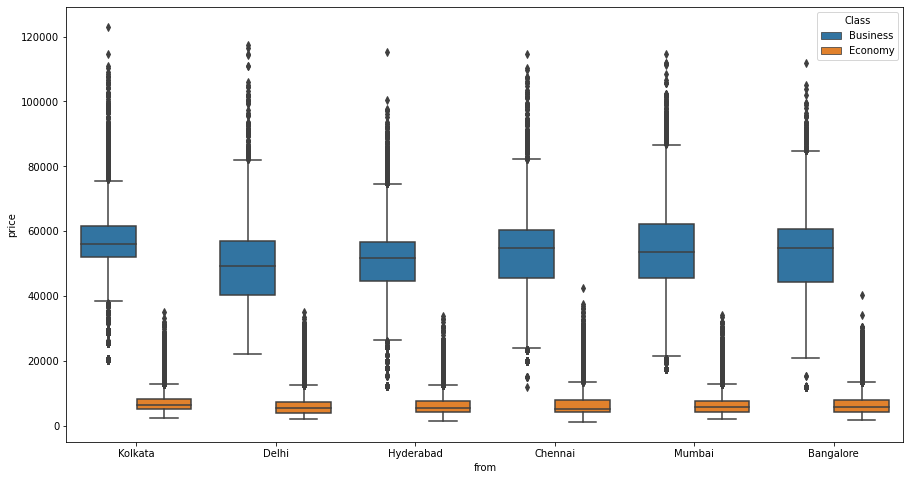

In [506]:
plt.figure(figsize=(15,8))
sns.boxplot(data=combined_df.sort_values('price',ascending=False),y='price',x='from',hue='Class')
plt.show

From above boxplot,we can say that ticket price is most expensive from **Kolkata**.

<function matplotlib.pyplot.show(close=None, block=None)>

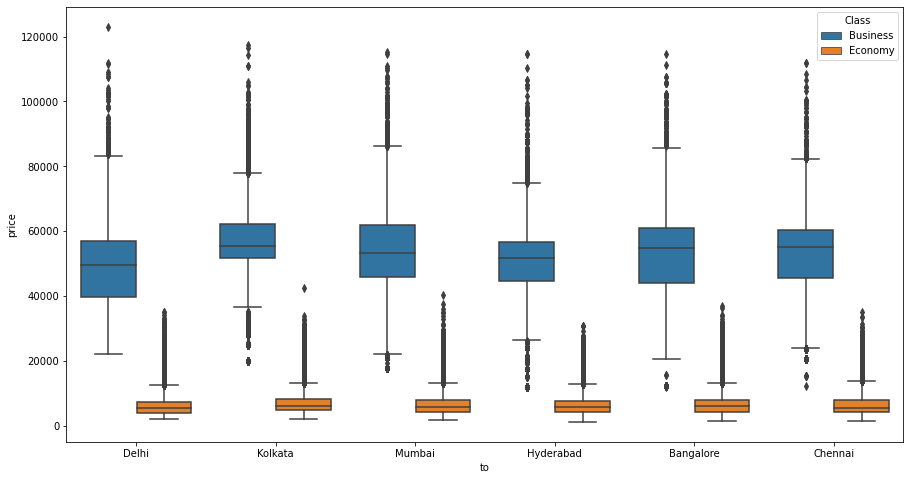

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='to',hue='Class')
plt.show

#### From above boxplot,we can say that ticket price is most expensive for the flights heading to Kolkata.

<function matplotlib.pyplot.show(close=None, block=None)>

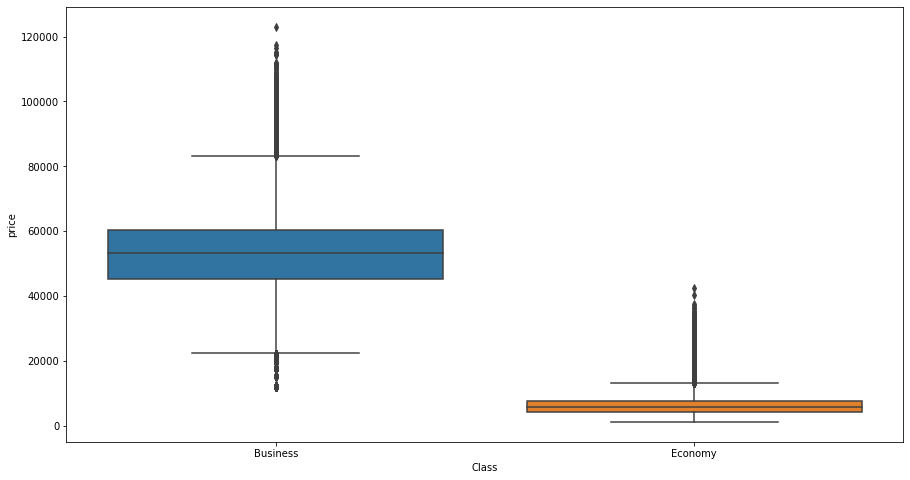

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='Class')
plt.show

#### Flight tickets for business class is most expensive.

<function matplotlib.pyplot.show(close=None, block=None)>

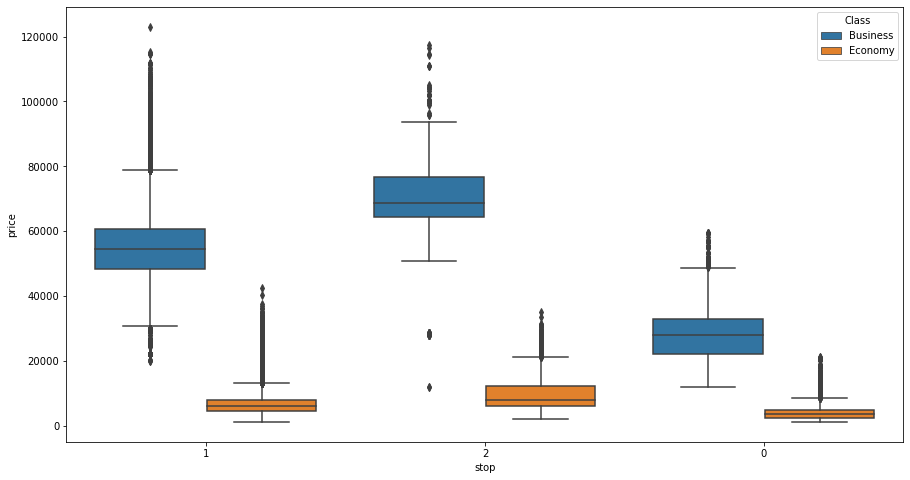

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),y='price',x='stop',hue='Class')
plt.show

#### Ticket prices are most expensive when there are only single stop.

In [49]:
pd.crosstab(df_full['airline'],df_full['route'])

route,Bangalore-Chennai,Bangalore-Delhi,Bangalore-Hyderabad,Bangalore-Kolkata,Bangalore-Mumbai,Chennai-Bangalore,Chennai-Delhi,Chennai-Hyderabad,Chennai-Kolkata,Chennai-Mumbai,...,Kolkata-Bangalore,Kolkata-Chennai,Kolkata-Delhi,Kolkata-Hyderabad,Kolkata-Mumbai,Mumbai-Bangalore,Mumbai-Chennai,Mumbai-Delhi,Mumbai-Hyderabad,Mumbai-Kolkata
airline,,,,,,,,,,,,,,,,,,,,,
Air India,1610,2633,2228,2026,3555,1638,1845,1432,1869,3128,...,1959,2096,3037,2054,3254,3632,3192,4650,3425,3478
AirAsia,138,1558,192,848,628,138,707,126,307,220,...,898,304,827,298,502,530,222,745,216,463
GO FIRST,369,1446,474,874,1338,382,576,38,172,121,...,801,123,1154,366,1146,1383,149,1684,1202,1150
Indigo,282,1961,1318,1637,1882,348,1747,1404,1541,1706,...,1487,1155,1865,1684,1105,1859,1787,1465,705,1690
SpiceJet,58,735,31,274,157,55,763,51,145,205,...,275,175,441,149,907,142,166,453,0,973
StarAir,0,0,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trujet,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
Vistara,3953,5423,4686,4370,5380,3932,4145,3052,2949,3958,...,4404,2800,3182,3346,4553,5339,4614,5812,4922,4848


#### We can see the max and min. number of flights corresponding to various airlines from particular 
#### source to desired destination

# Multivariate Analysis:

In [50]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.10,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.20,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai
2,11-02-2022,AirAsia,I5-764,04:25,Delhi,2.10,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai
3,11-02-2022,Vistara,UK-995,10:20,Delhi,2.15,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai
4,11-02-2022,Vistara,UK-963,08:50,Delhi,2.20,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai


<AxesSubplot:>

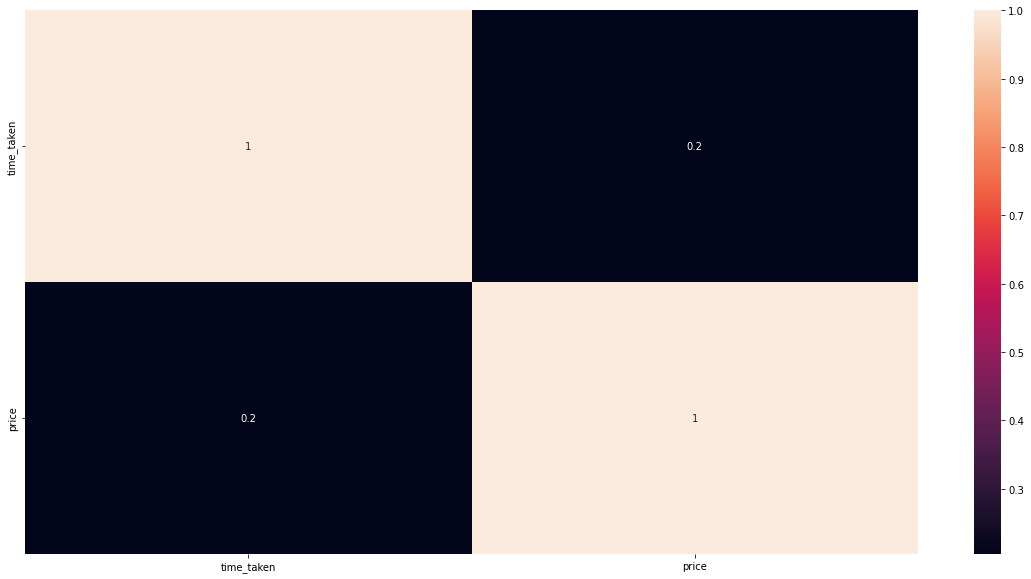

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_full.corr(),annot=True)

#### No strong correlation found.

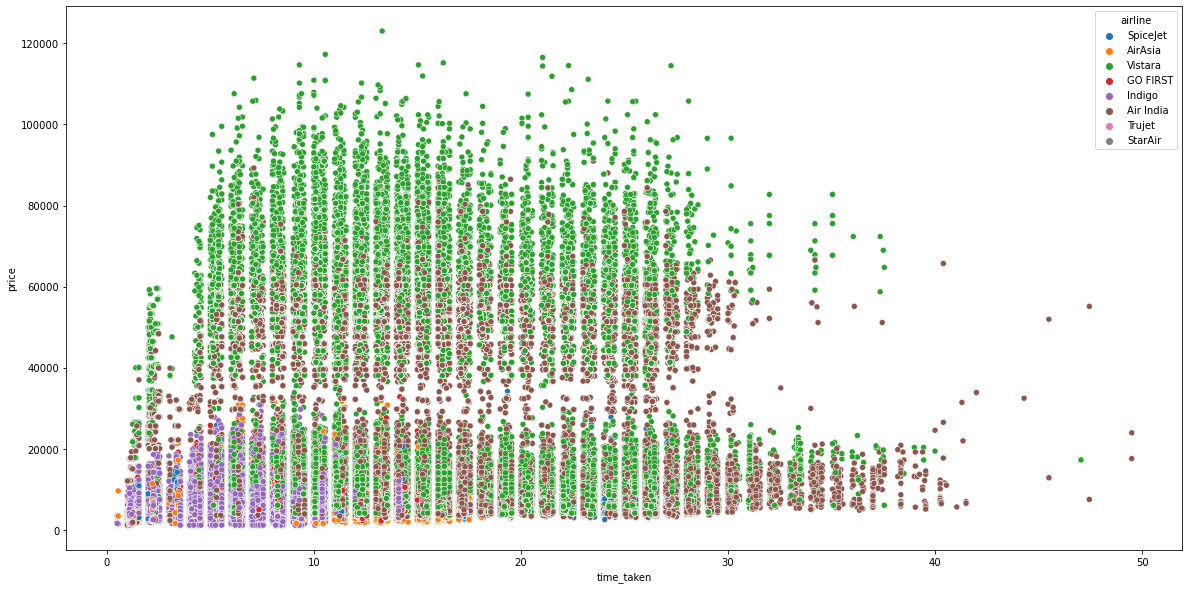

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(df_full['time_taken'],df_full['price'],hue=df_full['airline'])
plt.show()

In [53]:
#We can see from the above scatter plot that there are many green dots which are related to Vistara,clearly signifies that
#the airline is most expensive.
#Time taken by Air India and Vistara seems to be the largest among all.

# Missing Value:

In [54]:
df_full.isnull().sum()

date           0
airline        0
Flight_code    0
dep_time       0
from           0
time_taken     0
Class          0
stop           0
arr_time       0
to             0
price          0
route          0
dtype: int64

In [55]:
#Hence there are no missing values present.

# Feature Engineering:

In [56]:
df_full['Day']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.day
df_full['Week']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.week
df_full['Month']=pd.to_datetime(df_full.date, format="%d-%m-%Y").dt.month

In [57]:
df_full.head()

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.10,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,11,6,2
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.20,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,11,6,2
2,11-02-2022,AirAsia,I5-764,04:25,Delhi,2.10,Economy,0,06:35,Mumbai,5956,Delhi-Mumbai,11,6,2
3,11-02-2022,Vistara,UK-995,10:20,Delhi,2.15,Economy,0,12:35,Mumbai,5955,Delhi-Mumbai,11,6,2
4,11-02-2022,Vistara,UK-963,08:50,Delhi,2.20,Economy,0,11:10,Mumbai,5955,Delhi-Mumbai,11,6,2


In [58]:
df_full['Week']=df_full['Week'].astype(object)

#### Week is a catagorical so we converted the data dtype into object 

In [59]:
df_full.dtypes

date            object
airline         object
Flight_code     object
dep_time        object
from            object
time_taken     float64
Class           object
stop            object
arr_time        object
to              object
price            int32
route           object
Day              int64
Week            object
Month            int64
dtype: object

In [60]:
t=df_full['dep_time'].str.split(':',expand=True)
t=t.astype(int)
t=t[0]*60+t[1]
df_full["dep_time_in_min"]=t

In [61]:
df_full.head(2)

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month,dep_time_in_min
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.1,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,11,6,2,1135
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.2,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,11,6,2,380


In [62]:
departure_time=[]
for i in df_full.dep_time_in_min:
    if i < 288:
        a="Early_morning"
        departure_time.append(a)
        
    elif 288<i<576:
        b="Morning"
        departure_time.append(b)
    elif 576<i<864:
        c="Afternoon"
        departure_time.append(c)
    elif 864<i<1152:
        d="Evening"
        departure_time.append(d)
    else:
        e="Midnight"
        departure_time.append(e)

In [63]:
df_full['departure_time']=departure_time
df_full.head(2)

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month,dep_time_in_min,departure_time
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.1,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,11,6,2,1135,Evening
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.2,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,11,6,2,380,Morning


In [64]:
df_full['departure_time'].value_counts()

Morning          89023
Afternoon        77033
Evening          71327
Midnight         60350
Early_morning     2528
Name: departure_time, dtype: int64

In [65]:
at=df_full['arr_time'].str.split(':',expand=True)
at=at.astype(int)
at=at[0]*60+at[1]
df_full['arr_time_in_min']=at

In [66]:
arrival_time=[]
for i in df_full.arr_time_in_min:
    if i < 288:
        a="Early_morning"
        arrival_time.append(a)
        
    elif 288<i<576:
        b="Morning"
        arrival_time.append(b)
    elif 576<i<864:
        c="Afternoon"
        arrival_time.append(c)
    elif 864<i<1152:
        d="Evening"
        arrival_time.append(d)
    else:
        e="Midnight"
        arrival_time.append(e)

In [67]:
df_full['arrival_time']=arrival_time
df_full.head(2)

,date,airline,Flight_code,dep_time,from,time_taken,Class,stop,arr_time,to,price,route,Day,Week,Month,dep_time_in_min,departure_time,arr_time_in_min,arrival_time
0,11-02-2022,SpiceJet,SG-8709,18:55,Delhi,2.1,Economy,0,21:05,Mumbai,5953,Delhi-Mumbai,11,6,2,1135,Evening,1265,Midnight
1,11-02-2022,SpiceJet,SG-8157,06:20,Delhi,2.2,Economy,0,08:40,Mumbai,5953,Delhi-Mumbai,11,6,2,380,Morning,520,Morning


In [68]:
df_full.drop(columns=['dep_time_in_min',"arr_time_in_min"],inplace=True)

In [69]:
df_full.drop(columns=['dep_time','arr_time'],inplace=True)

In [70]:
df_full.drop(columns='Day',inplace=True)

In [71]:
from datetime import date
import calendar

In [72]:
df_full['date_dup']=pd.to_datetime(df_full.date,format='%d-%m-%Y')

In [73]:
weekday=[]
for i in df_full['date_dup']:
    a=i.strftime('%A')
    weekday.append(a)
    

In [74]:
df_full['day_of_week']=weekday
df_full.head(2)

,date,airline,Flight_code,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,date_dup,day_of_week
0,11-02-2022,SpiceJet,SG-8709,Delhi,2.1,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,2022-02-11,Friday
1,11-02-2022,SpiceJet,SG-8157,Delhi,2.2,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,2022-02-11,Friday


In [75]:
df_full.drop(columns='date_dup',inplace=True)

In [76]:
df_full.dtypes

date               object
airline            object
Flight_code        object
from               object
time_taken        float64
Class              object
stop               object
to                 object
price               int32
route              object
Week               object
Month               int64
departure_time     object
arrival_time       object
day_of_week        object
dtype: object

In [77]:
#Now dropping all the redundant columns:
df_full.drop(['date'],axis=1,inplace=True)

In [78]:
df_full.drop(['Flight_code'],axis=1,inplace=True)

In [79]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,Delhi-Mumbai,6,2,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Morning,Afternoon,Friday


In [80]:
df_full.dtypes

airline            object
from               object
time_taken        float64
Class              object
stop               object
to                 object
price               int32
route              object
Week               object
Month               int64
departure_time     object
arrival_time       object
day_of_week        object
dtype: object

<AxesSubplot:xlabel='departure_time', ylabel='price'>

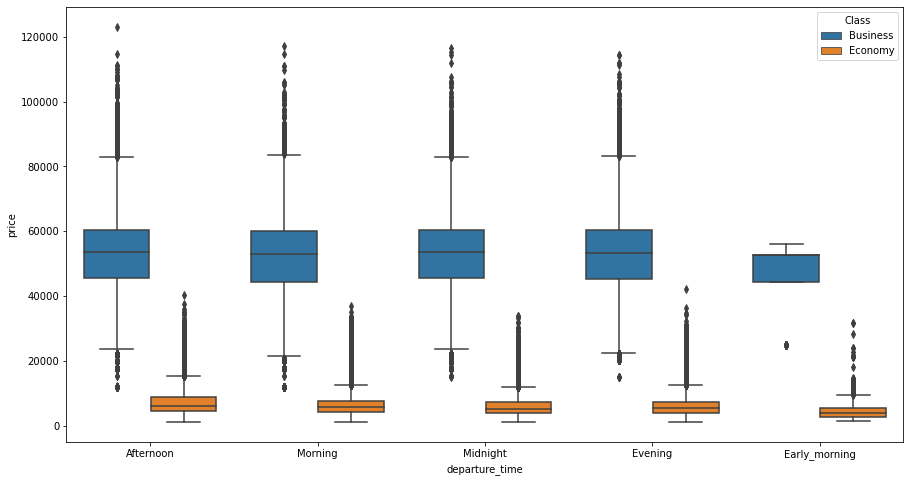

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),x='departure_time',y='price',hue='Class')

#### From the above plot it is very evident that Afternoon flights are more costly comparecd to the Early morning flights

<AxesSubplot:xlabel='day_of_week', ylabel='price'>

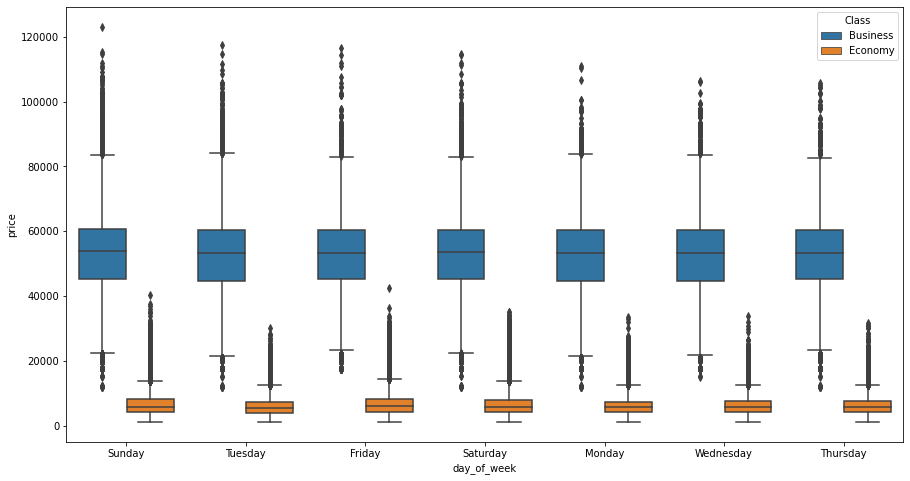

In [82]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_full.sort_values('price',ascending=False),x='day_of_week',y='price',hue='Class')

#### From the above plot we can see that on sundays tickets are more expensive

In [83]:
df_full_num=df_full.select_dtypes(exclude='object')

time_taken


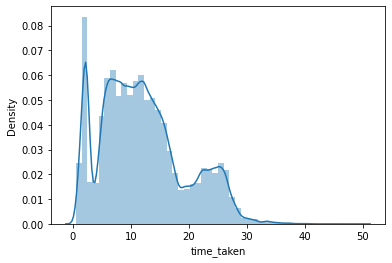

price


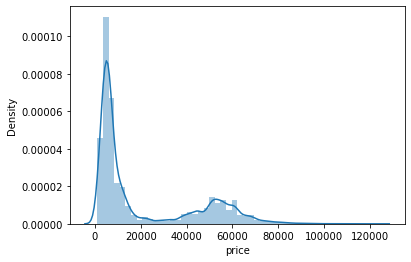

Month


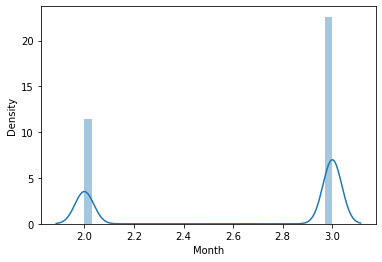

In [84]:
for i in df_full_num.columns:
    print(i)
    sns.distplot(df_full[i])
    plt.show()

<AxesSubplot:xlabel='time_taken', ylabel='price'>

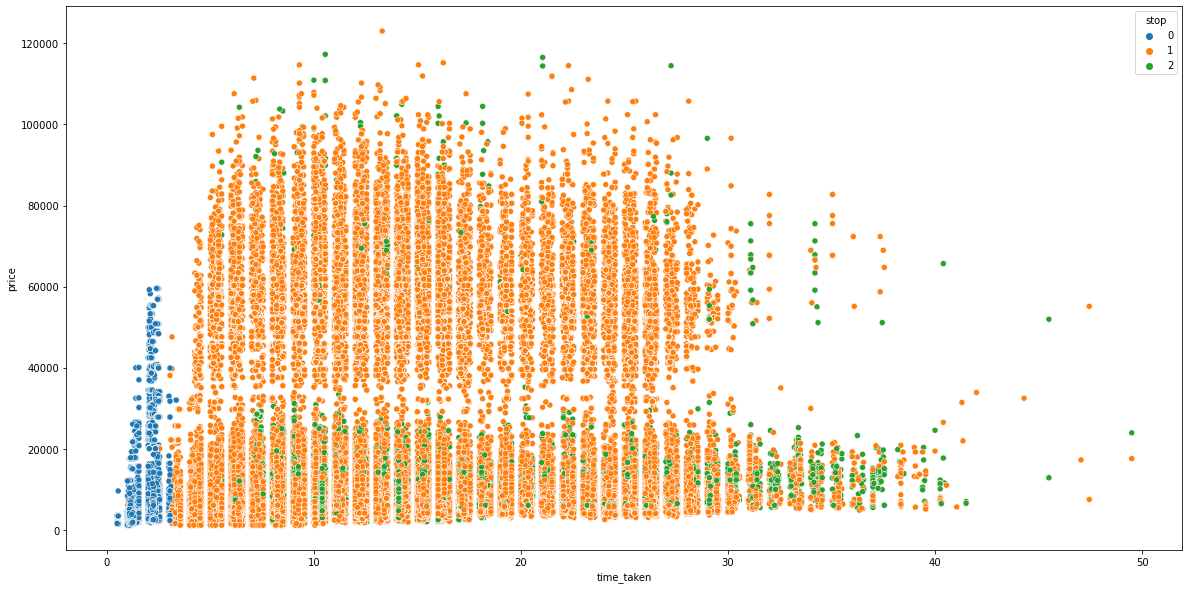

In [85]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='time_taken',y='price',data=df_full,hue='stop')

In [86]:
#From the above plot we can infer that,the maximum number of flights are having single stops only.
#Also as the time taken by the flights to reach the destination is increasing,the flight ticket fares 
#are eventually decreasing

In [87]:
df_full['time_taken'].skew()

0.6027060117485442

<AxesSubplot:xlabel='time_taken'>

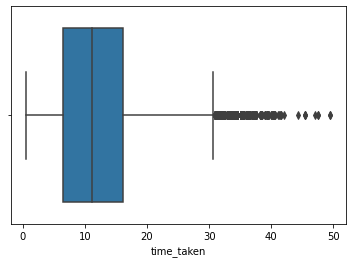

In [88]:
sns.boxplot(df_full['time_taken'])
#Though there are many outliers in time_taken column but we can't treat them because the data is an istance of real 
#life scenario.

In [89]:
for i in df_full_num.columns:
    print(i,'-',df_full[i].skew())
    

time_taken - 0.6027060117485442
price - 1.0618915252479717
Month - -0.6991453729571872


In [90]:
df_full_num.columns

Index(['time_taken', 'price', 'Month'], dtype='object')

In [91]:
#Target variable price is highly positive skewed.
#Rest other columns are normally skewed.

In [92]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,route,Week,Month,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,Delhi-Mumbai,6,2,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,Delhi-Mumbai,6,2,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,Delhi-Mumbai,6,2,Morning,Afternoon,Friday


In [93]:
df_full['Week'].unique()

array([6, 7, 8, 9, 10, 11, 12, 13], dtype=object)

In [94]:
df_full['Week'].value_counts()

9     45572
10    45537
12    45385
11    45314
8     44601
7     39177
13    24467
6     10208
Name: Week, dtype: int64

In [95]:
df_full.dtypes

airline            object
from               object
time_taken        float64
Class              object
stop               object
to                 object
price               int32
route              object
Week               object
Month               int64
departure_time     object
arrival_time       object
day_of_week        object
dtype: object

# Checking Standard deviation of Features:

In [96]:
df_full.std()

time_taken        7.194078
price         22695.911266
Week              1.968621
Month             0.471993
dtype: float64

In [97]:
#As the standard deviation of Month column is close to 0, so we can drop it.

In [98]:
df_full.drop(['Month'],axis=1,inplace=True)

In [99]:
df_full.drop(['route'],axis=1,inplace=True)

In [100]:
df_full.columns

Index(['airline', 'from', 'time_taken', 'Class', 'stop', 'to', 'price', 'Week',
       'departure_time', 'arrival_time', 'day_of_week'],
      dtype='object')

In [224]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,Week,departure_time,arrival_time,day_of_week,route
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,6,Evening,Midnight,Friday,Delhi-Mumbai
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,6,Morning,Morning,Friday,Delhi-Mumbai
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,6,Early_morning,Morning,Friday,Delhi-Mumbai
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,6,Afternoon,Afternoon,Friday,Delhi-Mumbai
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,6,Morning,Afternoon,Friday,Delhi-Mumbai


In [227]:
df_full_cat

,airline,from,Class,stop,to,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,Economy,0,Mumbai,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,Economy,0,Mumbai,6,Morning,Morning,Friday
2,AirAsia,Delhi,Economy,0,Mumbai,6,Early_morning,Morning,Friday
3,Vistara,Delhi,Economy,0,Mumbai,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,Economy,0,Mumbai,6,Morning,Afternoon,Friday
...,...,...,...,...,...,...,...,...,...
93482,Vistara,Chennai,Business,1,Hyderabad,13,Afternoon,Midnight,Thursday
93483,Vistara,Chennai,Business,1,Hyderabad,13,Afternoon,Midnight,Thursday
93484,Vistara,Chennai,Business,1,Hyderabad,13,Morning,Midnight,Thursday
93485,Vistara,Chennai,Business,1,Hyderabad,13,Morning,Evening,Thursday


In [231]:
for i in df_full_cat:
    print(i,':',df_full_cat[i].unique())
    print('------------------------------')

airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
------------------------------
from : ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
------------------------------
Class : ['Economy' 'Business']
------------------------------
stop : ['0' '1' '2']
------------------------------
to : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
------------------------------
Week : [6 7 8 9 10 11 12 13]
------------------------------
departure_time : ['Evening' 'Morning' 'Early_morning' 'Afternoon' 'Midnight']
------------------------------
arrival_time : ['Midnight' 'Morning' 'Afternoon' 'Evening' 'Early_morning']
------------------------------
day_of_week : ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
------------------------------


In [237]:
stats.shapiro(df_full['price'])
#As pvalue<0 so target variable not normally distributed.

ShapiroResult(statistic=0.7521358728408813, pvalue=0.0)

In [240]:
SpiceJet_price=df_full[df_full['airline']=='SpiceJet']['price']
AirAsia_price=df_full[df_full['airline']=='AirAsia']['price']
Vistara_price=df_full[df_full['airline']=='Vistara']['price']
GO_FIRST_price=df_full[df_full['airline']=='GO FIRST']['price']
Indigo_price=df_full[df_full['airline']=='Indigo']['price']
Air_India_price=df_full[df_full['airline']=='Air India']['price']
Trujet_price=df_full[df_full['airline']=='Trujet']['price']
StarAir_price=df_full[df_full['airline']=='StarAir']['price']

In [241]:
Delhi_price=df_full[df_full['from']=='Delhi']['price']
Mumbai_price=df_full[df_full['from']=='Mumbai']['price']
Bangalore_price=df_full[df_full['from']=='Bangalore']['price']
Kolkata_price=df_full[df_full['from']=='Kolkata']['price']
Hyderabad_price=df_full[df_full['from']=='Hyderabad']['price']
Chennai_price=df_full[df_full['from']=='Chennai']['price']

In [242]:
Economy_price=df_full[df_full['Class']=='Economy']['price']
Business_price=df_full[df_full['Class']=='Business']['price']

In [244]:
zero_price=df_full[df_full['stop']=='0']['price']
one_price=df_full[df_full['stop']=='1']['price']
two_price=df_full[df_full['stop']=='1']['price']

In [246]:
six_price=df_full[df_full['Week']=='6']['price']
sev_price=df_full[df_full['Week']=='7']['price']
eight_price=df_full[df_full['Week']=='8']['price']
nine_price=df_full[df_full['Week']=='9']['price']
ten_price=df_full[df_full['Week']=='10']['price']
elev_price=df_full[df_full['Week']=='11']['price']
twel_price=df_full[df_full['Week']=='12']['price']
thirt_price=df_full[df_full['Week']=='13']['price']

In [249]:
Friday_price=df_full[df_full['day_of_week']=='Friday']['price']
Saturday_price=df_full[df_full['day_of_week']=='Saturday']['price']
Sunday_price=df_full[df_full['day_of_week']=='Sunday']['price']
Monday_price=df_full[df_full['day_of_week']=='Monday']['price']
Tuesday_price=df_full[df_full['day_of_week']=='Tuesday']['price']
Wednesday_price=df_full[df_full['day_of_week']=='Wednesday']['price']
Thursday_price=df_full[df_full['day_of_week']=='Thursday']['price']

In [255]:
Evening_price=df_full[df_full['departure_time']=='Evening']['price']
Midnight_price=df_full[df_full['departure_time']=='Midnight']['price']
Morning_price=df_full[df_full['departure_time']=='Morning']['price']
Afternoon_price=df_full[df_full['departure_time']=='Afternoon']['price']
Early_morning_price=df_full[df_full['departure_time']=='Early_morning']['price']

# Performing Kruskal Wallis statistical test:

In [262]:
# Null : price & Categorical feature are Independent 

# Altr : price & Categorical feature are Dependent

In [247]:
stats.kruskal(SpiceJet_price,AirAsia_price,Vistara_price,GO_FIRST_price,Indigo_price,Air_India_price,Trujet_price,StarAir_price)

KruskalResult(statistic=94731.63523957026, pvalue=0.0)

In [250]:
stats.kruskal(Delhi_price,Mumbai_price,Bangalore_price,Kolkata_price,Hyderabad_price,Chennai_price)

KruskalResult(statistic=1861.330487494363, pvalue=0.0)

In [251]:
stats.kruskal(Economy_price,Business_price)

KruskalResult(statistic=192889.57644381927, pvalue=0.0)

In [252]:
stats.kruskal(zero_price,one_price,two_price)

KruskalResult(statistic=22067.231779610134, pvalue=0.0)

In [253]:
stats.kruskal(six_price,sev_price,eight_price,nine_price,ten_price,elev_price,twel_price,thirt_price)

KruskalResult(statistic=nan, pvalue=nan)

In [254]:
stats.kruskal(Friday_price,Saturday_price,Sunday_price,Monday_price,Tuesday_price,Wednesday_price,Thursday_price)

KruskalResult(statistic=343.5791815631043, pvalue=3.687638815293391e-71)

In [256]:
stats.kruskal(Evening_price,Midnight_price,Morning_price,Afternoon_price,Early_morning_price)

KruskalResult(statistic=2570.290107404528, pvalue=0.0)

Inference: All the categorical columns have their pvalues<0.05 Thus every one of them is affecting the Target variable,price.

In [258]:
df_full_num

,index,time_taken
0,0,2.10
1,1,2.20
2,2,2.10
3,3,2.15
4,4,2.20
...,...,...
300256,93482,10.05
300257,93483,10.25
300258,93484,13.50
300259,93485,10.00


# Performing Spearmanr Statistical Test:

In [260]:
### NULL :  price & time_taken are Independent

### ALTR : price & time_taken are Dependent

In [259]:
stats.shapiro(df_full['time_taken'])
#time_taken column is also not normally distributed.

ShapiroResult(statistic=0.9561505913734436, pvalue=0.0)

In [261]:
stats.spearmanr(df_full['time_taken'],df_full['price'])

SpearmanrResult(correlation=0.31925408423044854, pvalue=0.0)

Inference: As pvalue<0.05, Thus we can say time_taken to be the significant feature in predicting ticket price.

# Encoding and Scaling:

Split the dependent and independent variables.

In [101]:
df_full.head()

,airline,from,time_taken,Class,stop,to,price,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,2.10,Economy,0,Mumbai,5953,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,2.20,Economy,0,Mumbai,5953,6,Morning,Morning,Friday
2,AirAsia,Delhi,2.10,Economy,0,Mumbai,5956,6,Early_morning,Morning,Friday
3,Vistara,Delhi,2.15,Economy,0,Mumbai,5955,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,2.20,Economy,0,Mumbai,5955,6,Morning,Afternoon,Friday


In [102]:
df_full_target=df_full['price']
df_full_feature=df_full.drop('price',axis=1)

In [103]:
#Filter numerical and categorical variables.
df_full_num = df_full_feature.select_dtypes(include = [np.number])
df_full_cat = df_full_feature.select_dtypes(include = [np.object])

In [104]:
df_full_cat.head()

,airline,from,Class,stop,to,Week,departure_time,arrival_time,day_of_week
0,SpiceJet,Delhi,Economy,0,Mumbai,6,Evening,Midnight,Friday
1,SpiceJet,Delhi,Economy,0,Mumbai,6,Morning,Morning,Friday
2,AirAsia,Delhi,Economy,0,Mumbai,6,Early_morning,Morning,Friday
3,Vistara,Delhi,Economy,0,Mumbai,6,Afternoon,Afternoon,Friday
4,Vistara,Delhi,Economy,0,Mumbai,6,Morning,Afternoon,Friday


In [105]:
#Now we are encoding each categorical feature using dummy encoding.
dummy_var = pd.get_dummies(data = df_full_cat, drop_first = True)

In [106]:
dummy_var.head()

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### We have only one numerical column that is time_taken.So we are not scaling the Data

In [107]:
dummy_var.reset_index(inplace=True)

In [108]:
df_full_num.reset_index(inplace=True)

In [109]:
dummy_var.head()

,index,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
X = pd.concat([df_full_num, dummy_var], axis = 1)

X.head()

,index,time_taken,index,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,2.10,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,2.20,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,2.10,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,2.15,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2.20,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X.drop(['index'],axis=1,inplace=True)

In [112]:
X.head()

,time_taken,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,...,arrival_time_Early_morning,arrival_time_Evening,arrival_time_Midnight,arrival_time_Morning,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2.10,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2.20,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2.10,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,2.15,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.20,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
y=df_full['price']

# Train-Test Split:

In [114]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [115]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [116]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (210182, 43)
y_train (210182,)
X_test (90079, 43)
y_test (90079,)


In [117]:
X_train.columns

Index(['const', 'time_taken', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Chennai', 'from_Delhi',
       'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'Class_Economy',
       'stop_1', 'stop_2', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'Week_7', 'Week_8', 'Week_9', 'Week_10',
       'Week_11', 'Week_12', 'Week_13', 'departure_time_Early_morning',
       'departure_time_Evening', 'departure_time_Midnight',
       'departure_time_Morning', 'arrival_time_Early_morning',
       'arrival_time_Evening', 'arrival_time_Midnight', 'arrival_time_Morning',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

# Performing 2 sample ttest over sample:

Null hypothesis: u1=u2 (mean of both the sample is same,ie. samples belongs to same population)
Alternate hypothesis: u1!=u2 (mean of both the sample is different,ie. samples do not belong to same population)

In [118]:
from scipy import stats
stats.ttest_ind(y_train,y_test)

Ttest_indResult(statistic=0.481467618703109, pvalue=0.6301845393990948)

In [119]:
#Here as pvalue > 0.05, so we fail to reject null hypothesis. Thus we can say that both the samples belong 
#to same population. 

# Checking Multicollinearity before model building:

<AxesSubplot:>

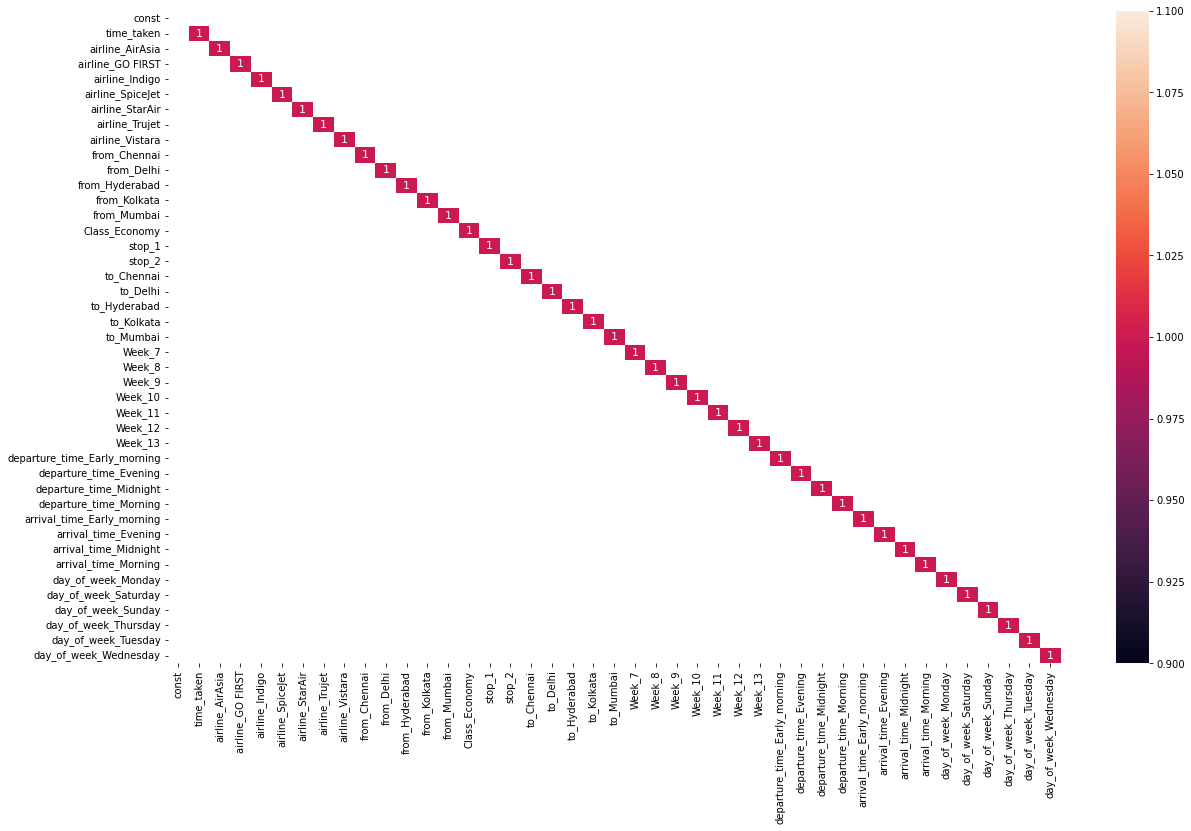

In [120]:
plt.figure(figsize = (20,12))
sns.heatmap(X_train.corr()[np.abs(X_train.corr()) > 0.8], annot = True, annot_kws = {"size": 11})

#### Interpretation: The above heatmap, show the no variables  are having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation

# Building MLR Model using OLS Technique:

In [121]:
MLR_Model=sm.OLS(y_train.values.reshape(-1,1),X_train).fit()
print(MLR_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 5.323e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:19:02   Log-Likelihood:            -2.1485e+06
No. Observations:              210182   AIC:                         4.297e+06
Df Residuals:                  210139   BIC:                         4.298e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Interpretation:
1)From the above build model we can see that Condition Number is more than 1000,which implies that there is high multicollinearity present. 2)The summary output shows that the value of the Durbin-Watson is approximately equal to 2,which means there is no-autocorrelation. 3)The p-value came from JB Test is less than 0.05,which shows that errors are not normal in nature.

# Checking which features are multicollinear with the help of VIF technique:

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
df_full_feature_vif = X_train.select_dtypes(include=[np.number])

In [124]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_full_feature_vif.values, i) for i in range(df_full_feature_vif.shape[1])]
vif["Features"] = df_full_feature_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,72.740552,const
1,4.884097,Week_12
2,4.878726,Week_11
3,4.872988,Week_9
4,4.865496,Week_10
5,4.815639,Week_8
6,4.417305,Week_7
7,3.488750,Week_13
8,1.961269,arrival_time_Midnight
9,1.902651,stop_1


#### From above table we can infer that the VIF for every feature seems lesser than 5. As a result of which there is the presence 
#### of only moderate multicolinearity. So we can ignore and move forward with model building.

# Checking for Linear Relationship between Dependent and Independent Variable:

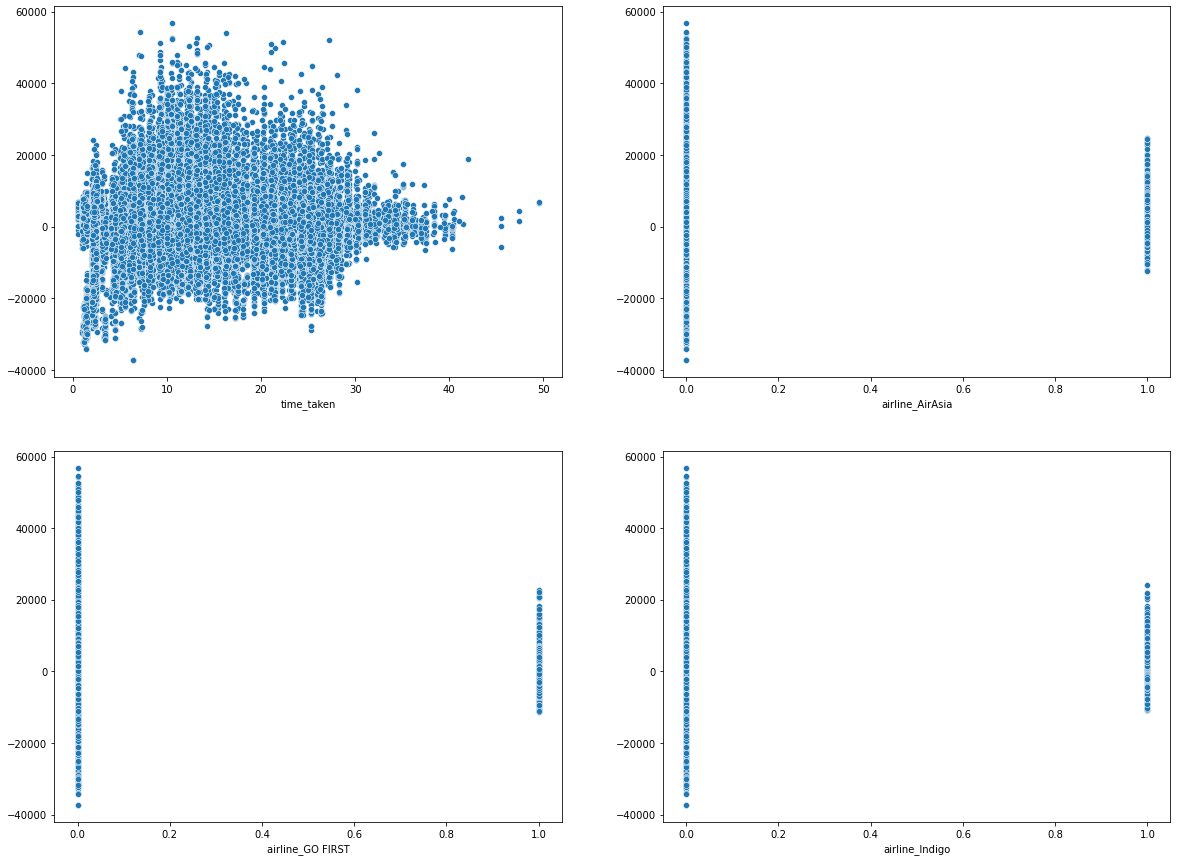

In [125]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], MLR_Model.resid , ax=subplot)

plt.show()

#### Interpretation: The above plots show specific pattern except time_taken column, implies that there is   linearity present in the time_taken column only.

In [126]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [127]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_Model.resid, MLR_Model.model.exog)
lzip(name, test[2:])

[('f-value', 1361.8654671312624), ('p-value', 0.0)]

Interpretation: We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

# Checking for Normality in Residuals:

In [128]:
from scipy import stats
from scipy.stats import shapiro

In [129]:
#With the help of Shapiro-wilk test we are looking for normality in Residuals:
stat, p_value = shapiro(MLR_Model.resid)


print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9118881821632385
P-Value: 0.0


Interpretation: From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.

# Now Creating generalized functions to calculate various metrics for models:

Create a generalized function to calculate the RMSE for train and test set.

In [130]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [131]:
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

Create a generalized function to calculate the MAPE for test set.

In [132]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [133]:
def get_score(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

Create a generalized function to create a dataframe containing the scores from all the models

In [134]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    
    global score_card

    
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# Building a MLR model on a training dataset:

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [136]:
# initiate linear regression model
linreg = LinearRegression()


MLR_model = linreg.fit(X_train, y_train)


MLR_model.score(X_train, y_train)

0.9140865665498183

In [137]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  6655.1247
RMSE on test set:  6647.4941
Difference between RMSE on train and test set:  7.630600000000413


Interpretation: RMSE on the training set is 6655.1247, while on the test set it is 6647.4941. We can see that there is very minimal difference in the RMSE of the train and the test set. This implies that our model is normal-fitted.

In [138]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405


# Gradient Descent

#### Build MLR model using SGD method.

In [139]:
from sklearn.linear_model import SGDRegressor

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 6716.6479
RMSE on test set: 6707.8989


In [140]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089


# Regularization

# Ridge Regression

#### Build regression model using Ridge Regression for alpha = 1.

In [141]:
from sklearn.linear_model import Ridge

# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 6647.4899


#### Interpretation:After applying the ridge regression with alpha equal to one, we get 0.2992 as the RMSE value.

In [142]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089
2,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.4899,44.980602


Build regression model using Ridge Regression for alpha = 2.

In [143]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 6647.4867


# Lasso Regression

In [144]:
from sklearn.linear_model import Lasso
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 6647.491


In [145]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089
2,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.4899,44.980602
3,Lasso Regression,0.01,-,0.914087,0.914069,6647.491,44.982941


# Elastic Net Regression

In [146]:
from sklearn.linear_model import ElasticNet
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 9562.7331


In [147]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089
2,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.4899,44.980602
3,Lasso Regression,0.01,-,0.914087,0.914069,6647.491,44.982941
4,Elastic Net Regression,0.1,0.01,0.821958,0.821922,9562.7331,73.375146


# Grid Search CV

Find optimal value of alpha for Ridge Regression

In [148]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 6647.4937


In [149]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089
2,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.4899,44.980602
3,Lasso Regression,0.01,-,0.914087,0.914069,6647.491,44.982941
4,Elastic Net Regression,0.1,0.01,0.821958,0.821922,9562.7331,73.375146
5,Ridge Regression (using GridSearchCV),0.1,-,0.914087,0.914069,6647.4937,44.984023


Find optimal value of alpha for Lasso Regression

In [150]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.01} 

RMSE on test set: 6647.491


In [151]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089
2,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.4899,44.980602
3,Lasso Regression,0.01,-,0.914087,0.914069,6647.491,44.982941
4,Elastic Net Regression,0.1,0.01,0.821958,0.821922,9562.7331,73.375146
5,Ridge Regression (using GridSearchCV),0.1,-,0.914087,0.914069,6647.4937,44.984023
6,Lasso Regression (using GridSearchCV),0.01,-,0.914087,0.914069,6647.491,44.982941


Find optimal value of alpha for Elastic Net Regression

In [152]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)



# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 6647.5242


In [153]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.914087,0.914069,6647.4941,44.984405
1,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.8989,43.109089
2,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.4899,44.980602
3,Lasso Regression,0.01,-,0.914087,0.914069,6647.491,44.982941
4,Elastic Net Regression,0.1,0.01,0.821958,0.821922,9562.7331,73.375146
5,Ridge Regression (using GridSearchCV),0.1,-,0.914087,0.914069,6647.4937,44.984023
6,Lasso Regression (using GridSearchCV),0.01,-,0.914087,0.914069,6647.491,44.982941
7,Elastic Net Regression (using GridSearchCV),0.0001,0.2,0.914084,0.914066,6647.5242,44.925137


Display the score card summary

In [154]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.914087,0.914069,6647.489900,44.980602
1,Lasso Regression,0.01,-,0.914087,0.914069,6647.491000,44.982941
2,Lasso Regression (using GridSearchCV),0.010000,-,0.914087,0.914069,6647.491000,44.982941
3,Ridge Regression (using GridSearchCV),0.100000,-,0.914087,0.914069,6647.493700,44.984023
4,Linear Regression,-,-,0.914087,0.914069,6647.494100,44.984405
5,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.914084,0.914066,6647.524200,44.925137
6,Linear Regression (using SGD),-,-,0.912491,0.912473,6707.898900,43.109089
7,Elastic Net Regression,0.1,0.01,0.821958,0.821922,9562.733100,73.375146


#  Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

RF_Model=RandomForestRegressor(n_estimators=650,random_state=102,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.9775744978465906
Test RMSE: 3395.4688798634065


# Performing RandomsearchCV on Random Forest Regression

In [156]:
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [160]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ",r2_score(y_train.values, y_train_pred))
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ",r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  1915.3354290875689
R-Squared:  0.992883960327441
Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  2884.9076963564257
R-Squared:  0.9838115036253952


We can see that Random forest model after Hyperparameter Tuning is giving lower Test RMSE. Thus is better comparatively.

# Decision Tree

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
from sklearn.metrics import r2_score
DT_Model=DecisionTreeRegressor()
DT_Model.fit(X_train,y_train)
y_predict=DT_Model.predict(X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.9698128300675063
Test RMSE: 3939.4887618109083


CONCLUSION: We have done the following above model building before feature selection intentionally in order to find out
which model is performing the best by including all the features.
We found that Random_Forest is giving the best R2 score with lowest RMSE. Thus is the best model.

# Performing GridSearchCV on Decision Tree Regression

In [163]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [164]:
 # Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ",np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  2490.038299549153
R-Squared:  0.9879729053012675
Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  3582.4218092773713
R-Squared:  0.9750370384349579


We can see that Decision Tree model after Hyperparameter Tuning is giving lower Test RMSE. Thus is better comparatively.

# Feature Selection:

In [165]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [166]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select =None)

# fit the RFE model on the training dataset using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'from_Hyderabad', 'from_Kolkata', 'Class_Economy', 'stop_1', 'stop_2',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'Week_7', 'Week_8', 'Week_9',
       'Week_10', 'Week_11', 'Week_12', 'Week_13'],
      dtype='object')


In [167]:
X_train.columns

Index(['const', 'time_taken', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'from_Chennai', 'from_Delhi',
       'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'Class_Economy',
       'stop_1', 'stop_2', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'Week_7', 'Week_8', 'Week_9', 'Week_10',
       'Week_11', 'Week_12', 'Week_13', 'departure_time_Early_morning',
       'departure_time_Evening', 'departure_time_Midnight',
       'departure_time_Morning', 'arrival_time_Early_morning',
       'arrival_time_Evening', 'arrival_time_Midnight', 'arrival_time_Morning',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [168]:
New_X_train=X_train[['airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'from_Hyderabad', 'from_Kolkata', 'Class_Economy', 'stop_1', 'stop_2',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'Week_7', 'Week_8', 'Week_9',
       'Week_10', 'Week_11', 'Week_12', 'Week_13']]

In [169]:
New_X_train.columns.value_counts().sum()

21

In [170]:
New_X_train.shape

(210182, 21)

In [171]:
New_X_test=X_test[['airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'from_Hyderabad', 'from_Kolkata', 'Class_Economy', 'stop_1', 'stop_2',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'Week_7', 'Week_8', 'Week_9',
       'Week_10', 'Week_11', 'Week_12', 'Week_13']]

In [172]:
New_X_test.shape

(90079, 21)

# Now Creating generalized functions to calculate various metrics for models:

Create a generalized function to calculate the RMSE for train and test set.

In [173]:
def get_train_rmse(model):
    train_pred = model.predict(New_X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [174]:
def get_test_rmse(model):
    test_pred = model.predict(New_X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

Create a generalized function to calculate the MAPE for test set.

In [175]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(New_X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [176]:
def get_score(model):
    r_sq = model.score(New_X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

Create a generalized function to create a dataframe containing the scores from all the models

In [177]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    
    global score_card

    
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# Building a MLR model on a training dataset:

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [179]:
# initiate linear regression model
linreg = LinearRegression()


MLR_model = linreg.fit(New_X_train, y_train)


MLR_model.score(New_X_train, y_train)

0.9131973075379218

In [180]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  6689.4785
RMSE on test set:  6679.522
Difference between RMSE on train and test set:  9.956500000000233


Interpretation: RMSE on the training set is 6689.47, while on the test set it is 6679.522. We can see that there is very minimal difference in the RMSE of the train and the test set. This implies that our model is normal-fitted.

In [181]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819


# Gradient Descent

Build MLR model using SGD method.

In [182]:
from sklearn.linear_model import SGDRegressor

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(New_X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 6690.4598
RMSE on test set: 6679.9199


In [183]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011


# Regularization

# Ridge Regression

Build regression model using Ridge Regression for alpha = 1.

In [184]:
from sklearn.linear_model import Ridge

# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(New_X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 6679.5159


Interpretation:After applying the ridge regression with alpha equal to one, we get 0.2992 as the RMSE value.

In [185]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081


Build regression model using Ridge Regression for alpha = 2.

In [186]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(New_X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 6679.5108


Interpretation: After applying the ridge regression with alpha equal to two, the RMSE value is same.

In [187]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081
3,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.5108,45.397384


# Lasso Regression

In [188]:
from sklearn.linear_model import Lasso
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(New_X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 6679.5194


In [189]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081
3,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.5108,45.397384
4,Lasso Regression,0.01,-,0.913197,0.91318,6679.5194,45.401515


# Elastic Net Regression

In [190]:
from sklearn.linear_model import ElasticNet
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(New_X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 9594.3016


In [191]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081
3,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.5108,45.397384
4,Lasso Regression,0.01,-,0.913197,0.91318,6679.5194,45.401515
5,Elastic Net Regression,0.1,0.01,0.820598,0.820561,9594.3016,77.000525


# Grid Search CV

Find optimal value of alpha for Ridge Regression

In [192]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 6679.5214


In [193]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081
3,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.5108,45.397384
4,Lasso Regression,0.01,-,0.913197,0.91318,6679.5194,45.401515
5,Elastic Net Regression,0.1,0.01,0.820598,0.820561,9594.3016,77.000525
6,Ridge Regression (using GridSearchCV),0.1,-,0.913197,0.91318,6679.5214,45.402542


Find optimal value of alpha for Lasso Regression

In [194]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-15} 

RMSE on test set: 6679.522


In [195]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081
3,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.5108,45.397384
4,Lasso Regression,0.01,-,0.913197,0.91318,6679.5194,45.401515
5,Elastic Net Regression,0.1,0.01,0.820598,0.820561,9594.3016,77.000525
6,Ridge Regression (using GridSearchCV),0.1,-,0.913197,0.91318,6679.5214,45.402542
7,Lasso Regression (using GridSearchCV),0.0,-,0.913197,0.91318,6679.522,45.402819


Find optimal value of alpha for Elastic Net Regression

In [196]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)



# fit the model on X_train and y_train using fit()
enet_grid.fit(New_X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 6679.5225


In [197]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.913197,0.91318,6679.522,45.402819
1,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.9199,45.675011
2,Ridge Regression (with alpha = 1),1,-,0.913197,0.91318,6679.5159,45.400081
3,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.5108,45.397384
4,Lasso Regression,0.01,-,0.913197,0.91318,6679.5194,45.401515
5,Elastic Net Regression,0.1,0.01,0.820598,0.820561,9594.3016,77.000525
6,Ridge Regression (using GridSearchCV),0.1,-,0.913197,0.91318,6679.5214,45.402542
7,Lasso Regression (using GridSearchCV),0.0,-,0.913197,0.91318,6679.522,45.402819
8,Elastic Net Regression (using GridSearchCV),0.0001,0.2,0.913195,0.913177,6679.5225,45.360994


Display the score card summary

In [198]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 2),2,-,0.913197,0.913179,6679.510800,45.397384
1,Ridge Regression (with alpha = 1),1,-,0.913197,0.913180,6679.515900,45.400081
2,Lasso Regression,0.01,-,0.913197,0.913180,6679.519400,45.401515
3,Ridge Regression (using GridSearchCV),0.100000,-,0.913197,0.913180,6679.521400,45.402542
4,Linear Regression,-,-,0.913197,0.913180,6679.522000,45.402819
5,Lasso Regression (using GridSearchCV),0.000000,-,0.913197,0.913180,6679.522000,45.402819
6,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.913195,0.913177,6679.522500,45.360994
7,Linear Regression (using SGD),-,-,0.913172,0.913154,6679.919900,45.675011
8,Elastic Net Regression,0.1,0.01,0.820598,0.820561,9594.301600,77.000525


#  Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF_Model=RandomForestRegressor(n_estimators=650,random_state=102,min_samples_leaf=.0001)
RF_Model.fit(New_X_train,y_train)
y_predict=RF_Model.predict(New_X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.94603344936285
Test RMSE: 5267.335680713421


# Performing RandomsearchCV on Random Forest Regression

In [211]:
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(New_X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_absolute_error')

In [212]:
#Predicting train and test results
y_train_pred = random_regressor.predict(New_X_train)
y_test_pred = random_regressor.predict(New_X_test)
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ",r2_score(y_train.values, y_train_pred))
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ",r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  5207.973759479509
R-Squared:  0.9473878255955891
Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  5246.113115883599
R-Squared:  0.946467445376615


We can see that Random forest model after Hyperparameter Tuning is giving lower Test RMSE. Thus is better comparatively.

# Decision Tree

In [213]:
from sklearn.tree import DecisionTreeRegressor

In [214]:
from sklearn.metrics import r2_score
DT_Model=DecisionTreeRegressor()
DT_Model.fit(New_X_train,y_train)
y_predict=DT_Model.predict(New_X_test)
print('R2 score:',r2_score(y_test,y_predict))
print('Test RMSE:',mean_squared_error(y_test,y_predict,squared=False))

R2 score: 0.9464260600060801
Test RMSE: 5248.1405774084415


# Performing GridSearchCV on Decision Tree Regression

In [215]:
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(New_X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [216]:
 # Predicting train and test results
y_train_pred = tree.predict(New_X_train)
y_test_pred = tree.predict(New_X_test)
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ",np.sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ",np.sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  5207.109531931735
R-Squared:  0.9474052854062345
Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  5248.12091783339
R-Squared:  0.9464264613821125


We can see that Decision model after Hyperparameter Tuning is giving similar Test RMSE results.

#CONCLUSION: We have finally performed feature selection over the entire features in order to get the best features. Feature selection is generally done as it decreases over-fitting. Fewer redundant data means fewer chances of making decisions based on noise.Reduces Training Time. Less data means quicker algorithms.



# From the above models build, we found Random Forest model using Hyperparameter tuning to be working best on the selected features.